# Covariance Conversion

## From resonnance parameters to WMP covariance

### Analytic sensitivites from complex contour integrals

#### A 1-level-1channel toy Problem

This program implements in Python 3 :
      - a toy-problem for conversion using the contour integral method
      - conversions for poles an residues
      - plots things

NOTE : author is Pablo DUCRU, for any inquires please e-mail at  *** p_ducru@mit.edu ***

In [1]:
## Import Python package for linear algebra
import numpy as np

In [2]:
## Importing Python packages for plotting
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter


Import local data and functions

In [91]:
from slbw import  evaluate_Σγ, dΣγ_dΓ, z_space_Σγ, analytic_Σγ, analytic_dΣγ_dΓ, multipole_Σ, multipole_dΣ_dΓ,  exact_poles_and_residues
from data import a_U238, ρ0_U238, ρ0, μ_E0_U238, μ_Γn_U238, μ_Γγ_U238, μ_Γ_U238, cov_Γ_U238 
from vector_fit import VF_algorithm, rational_function

## Nuclear Cross Section Model (SLBW for this benchmark)

#### Plotting the cross section

In [4]:
# Energy grid structure
E_max = 10**6 # Minimum energy of the energy groups
E_min = 10**-4 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5 # Energy groups (here log-spaced) for flux ψ

# number densities (corrected to include the spin statistical factors)
N_densities = np.array([1,(0.124954)*1.0])

# scattering cross section
σ_nn = 0.166810

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


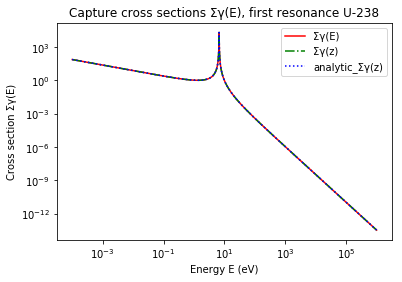

In [5]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.array([evaluate_Σγ(E_g[g], μ_Γ_U238) for g in range(E_g.size)]) , '-r', label='Σγ(E)') 
plt.loglog(z_g**2 , np.array([z_space_Σγ(z_g[g], μ_Γ_U238) for g in range(z_g.size)]) , '-.g', label='Σγ(z)') 
plt.loglog(z_g**2 , np.array([analytic_Σγ(z_g[g], μ_Γ_U238) for g in range(z_g.size)]) , ':b', label='analytic_Σγ(z)') 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

#### SLBW derivative equations

In [6]:
ε = 0.000001 
Γ_U238_ε_E0 = np.array([μ_E0_U238 + ε, μ_Γn_U238, μ_Γγ_U238])
Γ_U238_ε_Γn = np.array([μ_E0_U238 , μ_Γn_U238 + ε, μ_Γγ_U238])
Γ_U238_ε_Γγ = np.array([μ_E0_U238, μ_Γn_U238, μ_Γγ_U238 + ε])


In [7]:
E_max = 10**6 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 10 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5

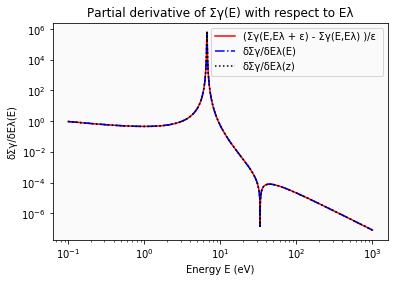

In [8]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 10000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5
## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Eλ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_E0) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Eλ + ε) - Σγ(E,Eλ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , '-.b', label='δΣγ/δEλ(E)') 
plt.loglog(z_g**2 , np.abs(np.array([ analytic_dΣγ_dΓ(z_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , ':k', label='δΣγ/δEλ(z)') 
plt.ylabel('δΣγ/δEλ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

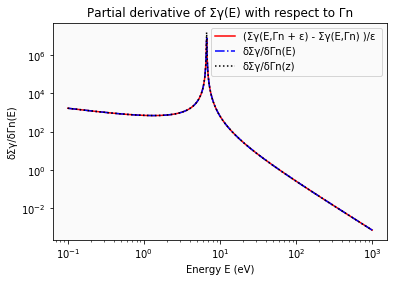

In [9]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Γn'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_Γn) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Γn + ε) - Σγ(E,Γn) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[1] for g in range(E_g.size)])) , '-.b', label='δΣγ/δΓn(E)') 
plt.loglog(z_g**2 , np.abs(np.array([ analytic_dΣγ_dΓ(z_g[g], μ_Γ_U238)[1] for g in range(z_g.size)])) , ':k', label='δΣγ/δΓn(z)') 
plt.ylabel('δΣγ/δΓn(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

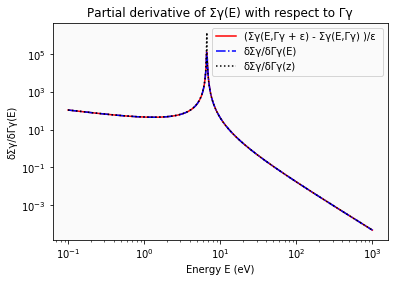

In [10]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Γγ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_Γγ) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Γγ + ε) - Σγ(E,Γγ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[2] for g in range(E_g.size)])) , '-.b', label='δΣγ/δΓγ(E)') 
plt.loglog(z_g**2 , np.abs(np.array([ analytic_dΣγ_dΓ(z_g[g], μ_Γ_U238)[2] for g in range(z_g.size)])) , ':k', label='δΣγ/δΓγ(z)') 
plt.ylabel('δΣγ/δΓγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

The latter tests show we have coded the derivatives in z-space correctly, (which can be continued to the entire complex plane, unlike the E-space ones because of the z = ±$\sqrt{E}$ mapping problem).

#### Sampling from resonance parameters

In [11]:
def sample_Γ_res_parameters(mean_Γ_all, cov_Γ_all): ## This implementation cannot take cross-resonance covariance yet
    Γ_sample = np.copy(mean_Γ_all)
    if mean_Γ_all.shape == (3,): ## This means only 1 resonance 
        Γ_sample = np.random.multivariate_normal(mean_Γ_all, cov_Γ_all) # LOG NORMAL mvln = np.exp(mvn) after sampling multivariate normal FOR NEGATIVE WIDTHS
    else:
        for λ in range(mean_Γ_all.shape[0]):
            Γ_sample[λ] = np.random.multivariate_normal(mean_Γ_all[λ], cov_Γ_all[λ]) # LOG NORMAL mvln = np.exp(mvn) after sampling multivariate normal
    return Γ_sample

No handles with labels found to put in legend.


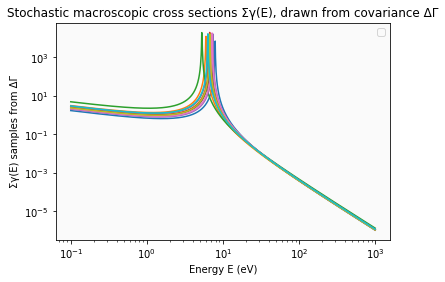

In [12]:
## Plot the cross sections from nuclear data uncertainty
titre_ΔΣ = 'Stochastic macroscopic cross sections Σγ(E), drawn from covariance ΔΓ'
titre_ΔΣ_pdf = "%s.%s"%(titre_ΔΣ, 'pdf')

#plt.close('all')
# Plotting the sampled cross sections
for i in range(10):
    Γ_sample = sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238)
    plt.loglog(E_g , np.array([evaluate_Σγ(E_g[g], Γ_sample) for g in range(E_g.size)])) #, '--r') 
plt.ylabel('Σγ(E) samples from ΔΓ')
plt.xlabel('Energy E (eV)')
plt.title(titre_ΔΣ )
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

E_0 = 1.589282865622978


Text(0.5,1,'Σmeanγ(E_0) = 1.047910829742427, meanΣγ(E_0) = 1.1213437675294444, Σγ_sigma_at_E0 = 0.32239989226845606, strd_dev_Σγ = 0.3811936009598664')

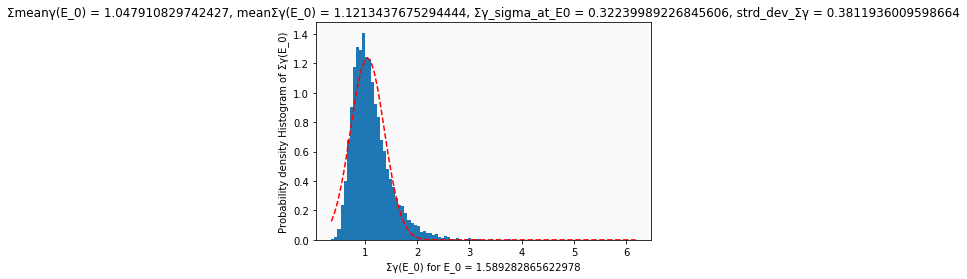

In [13]:
# the sampled data
n_samples = 10000
E_0 = E_g[300]
print("E_0 =", E_0 )
Σγ_hist = np.array([evaluate_Σγ(E_0, sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238))  for i in range(n_samples)])
mean_Σγ = np.sum(Σγ_hist)/n_samples
strd_dev_Σγ = (np.dot(Σγ_hist - mean_Σγ,Σγ_hist - mean_Σγ)/(n_samples-1))**0.5
fig, ax = plt.subplots()
# the histogram of the data
num_bins = 100
n, bins, patches = ax.hist(Σγ_hist, num_bins, density=1)

# add a 1st order sensitivity line
Σγ_mean = evaluate_Σγ(E_0, μ_Γ_U238)
Σγ_sigma_at_E0 = (np.dot(dΣγ_dΓ(E_0, μ_Γ_U238), np.dot(cov_Γ_U238,dΣγ_dΓ(E_0, μ_Γ_U238))))**0.5
Σγ_local_propagation = (1 / (np.sqrt(2 * np.pi) * Σγ_sigma_at_E0)) * np.exp(-0.5 * (1 / Σγ_sigma_at_E0 * (bins - Σγ_mean))**2) # )**2

ax.plot(bins, Σγ_local_propagation, '--r', label='1st order snesitivity analysis')

ax.set_xlabel('Σγ(E_0) for E_0 = %s'%(E_0) )
ax.set_ylabel('Probability density Histogram of Σγ(E_0)')
ax.set_title(r'Σmeanγ(E_0) = %s, meanΣγ(E_0) = %s, Σγ_sigma_at_E0 = %s, strd_dev_Σγ = %s'%(Σγ_mean, mean_Σγ, Σγ_sigma_at_E0, strd_dev_Σγ))




Here we observe what 1-st order sensitivity propagation means: the blue histogram is the different cross section values from a Monte Carlo sampling the gaussian $\Gamma$ resonance parameters, while the red dotted line is the gaussian around the cross section taken at mean resonance parameters. 

In [14]:
MC_mean = sum(Σγ_hist)/Σγ_hist.size
MC_mean

1.121343767529443

In [15]:
Σγ_mean

1.047910829742427

In [16]:
rel_mean_XS_vs_XS_of_mean = (MC_mean - Σγ_mean)/Σγ_mean 
rel_mean_XS_vs_XS_of_mean

0.07007555958274193

The discrepancy between the mean cross section over the UQ vs the cross section of the mean resonance parameters is of about 7%.

## Exact Multipole representation


In [17]:
Π = exact_poles_and_residues(μ_Γ_U238)
Π

array([[ 2.58346704+4.68426723e-03j,  0.        -7.05686182e+02j],
       [-2.58346704-4.68426723e-03j,  0.        -7.05686182e+02j]])

In [18]:
Π_tot = np.concatenate((Π, np.conj(Π)), axis=0)
Π_tot

array([[ 2.58346704+4.68426723e-03j,  0.        -7.05686182e+02j],
       [-2.58346704-4.68426723e-03j,  0.        -7.05686182e+02j],
       [ 2.58346704-4.68426723e-03j,  0.        +7.05686182e+02j],
       [-2.58346704+4.68426723e-03j,  0.        +7.05686182e+02j]])

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


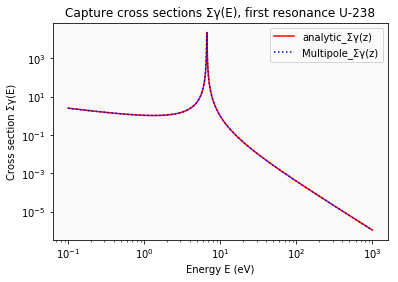

In [19]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(z_g**2 , np.array([analytic_Σγ(z_g[g], μ_Γ_U238) for g in range(z_g.size)]) , '-r', label='analytic_Σγ(z)') 
plt.loglog(z_g**2 , np.array([multipole_Σ(z_g[g], Π) for g in range(z_g.size)]) , ':b', label='Multipole_Σγ(z)') 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

## VF SLBW for mean poles and residues


Generate training points from the cross section

In [20]:
E_max_train = 10**5 # Minimum energy of the energy groups
E_min_train = 10**-3 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g_train = 10000 # Number of energy groups
x_train = np.logspace(np.log10(E_min_train),np.log10(E_max_train),N_g_train) # Energy groups (here log-spaced) for flux ψ
Y_train1 = np.array([x_train[g]**2 * z_space_Σγ(x_train[g], μ_Γ_U238) for g in range(x_train.size)]) #if you want


In [21]:
Y_train = np.transpose(np.array([Y_train1, Y_train1]))

VF algorithm results

In [22]:
VF_poles, VF_residues, VF_poly_coeff, VF_offset, VF_residual, barycentric_residues = VF_algorithm(x_train, Y_train, 100, 0, 4) ## add VF_poly_coeff when poly_order not zero 

The VF_algorithm was provided a number of poles to learn and is generating an initial guess
The training points are only along the real axis, and the initial guesses are generated accordingly with a shift


/Users/pabloducru/Etudes/MIT/Research/CODES/Pole Representation/Uncertainty-Methods-Toy-Problem/vector_fit.py:177: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  LS_vector, LS_residual, LS_rank , LS_singular_values = np.linalg.lstsq(LS_matrix, Y_LS_vector) ## np.linalg.solve(A.T.dot(A) + lamb * np.identity(n_col), A.T.dot(y)) For Tichonov


In [23]:
def Σγ_VF(z):
    return 1/z**2 * rational_function(z, VF_poles, VF_residues, VF_offset, VF_poly_coeff)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


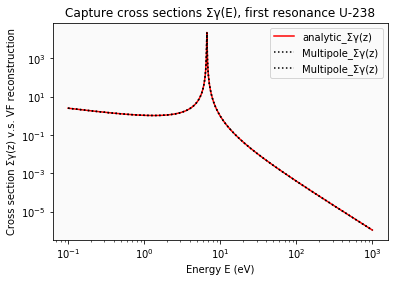

In [24]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(z_g**2 , np.array([z_space_Σγ(z_g[g], μ_Γ_U238) for g in range(z_g.size)]) , '-r', label='analytic_Σγ(z)') 
plt.loglog(z_g**2 , np.array([Σγ_VF(z_g[g]) for g in range(z_g.size)]) , ':k', label='Multipole_Σγ(z)') 
plt.ylabel('Cross section Σγ(z) v.s. VF reconstruction')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

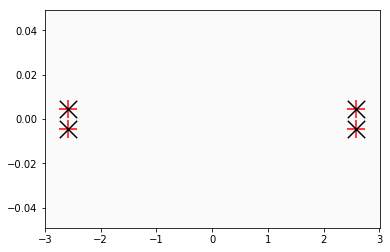

In [25]:
plt.scatter(np.real(np.array([Π_tot[j][0] for j in range(Π_tot.shape[0])])), np.imag(np.array([Π_tot[j][0] for j in range(Π_tot.shape[0])])), s=300, color='r', marker='+')
plt.scatter(np.real(VF_poles), np.imag(VF_poles), s=300,  color='k', marker='x')
plt.show()
plt.show()

In [26]:
Π_tot

array([[ 2.58346704+4.68426723e-03j,  0.        -7.05686182e+02j],
       [-2.58346704-4.68426723e-03j,  0.        -7.05686182e+02j],
       [ 2.58346704-4.68426723e-03j,  0.        +7.05686182e+02j],
       [-2.58346704+4.68426723e-03j,  0.        +7.05686182e+02j]])

In [27]:
VF_poles

array([-2.58346708+0.00468359j, -2.583467  -0.00468359j,
        2.58346704+0.00468427j,  2.58346704-0.00468427j])

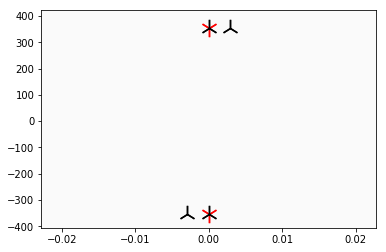

In [28]:
plt.scatter(np.real(np.array([Π_tot[j][1]/2 for j in range(Π_tot.shape[0])])), np.imag(np.array([Π_tot[j][1]/2 for j in range(Π_tot.shape[0])])), s=300, color='r', marker='1')
plt.scatter(np.real(VF_residues), np.imag(VF_residues), s=300,  color='k', marker='2')
plt.show()
plt.show()

In [29]:
VF_residues

array([[ 2.93612130e-03+352.89423607j,  2.93440596e-03+352.89423607j],
       [-2.93612132e-03-352.89423607j, -2.93440597e-03-352.89423607j],
       [ 1.26946560e-10-352.84309098j,  1.74442962e-11-352.84309098j],
       [-1.01855509e-10+352.84309098j,  3.69381833e-13+352.84309098j]])

In [30]:
Π_tot/2

array([[ 1.29173352+2.34213362e-03j,  0.        -3.52843091e+02j],
       [-1.29173352-2.34213362e-03j,  0.        -3.52843091e+02j],
       [ 1.29173352-2.34213362e-03j,  0.        +3.52843091e+02j],
       [-1.29173352+2.34213362e-03j,  0.        +3.52843091e+02j]])

## Contour Integrals


In [31]:
def divide_by_z_pow_n(f,n):
    def z_pow_n(z):
        return f(z)/(z**n)
    return z_pow_n

In [32]:
def multiply_by_z_min_p(f,p):
    def z_pow_n(z):
        return f(z)*(z-p)
    return z_pow_n

In [33]:
## Cauchy Residues Theorem
def Cauchy_residues_extraction(f,p, N_contour = 10000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f(p+ε*np.exp(2*np.pi*1j*(n/N_contour)))*np.exp(2*np.pi*1j*(n/N_contour))
    return contour_integral         

In [34]:
def f_flat(z):
    return np.array([1+1j, 1-1j])

In [35]:
Cauchy_residues_extraction(f_flat, 1+1j)

array([ 1.25824097e-19-1.46364646e-19j, -1.46364646e-19-1.25824097e-19j])

In [36]:
def rat1(z):
    return 10 + (1+1j)/(z-1) + (2+2*1j)/(z-1)**2

In [37]:
Cauchy_residues_extraction(rat1, 1+1j)

(-4.332044129613712e-18-1.326135958045014e-18j)

In [38]:
Cauchy_residues_extraction(divide_by_z_pow_n(rat1,1), 0)

(11.000000000000046+1.0000000000000002j)

In [39]:
Cauchy_residues_extraction(divide_by_z_pow_n(rat1,1), 2)

(3.0762119061908053e-18+5.422175532729997e-18j)

In [40]:
Cauchy_residues_extraction(multiply_by_z_min_p(rat1,1), 0)

(-4.869804172001786e-18+6.971081155902892e-18j)

In [41]:
Cauchy_residues_extraction(multiply_by_z_min_p(rat1,1), 1)

(2.0000000000000013+1.9999999999999982j)

In [42]:
def rat2(z):
    return np.array([(1+1j)/(1 - z), (1-1j)/(1j - z)])

In [43]:
Cauchy_residues_extraction(rat2, 1+1j)

array([1.16243361e-18+3.65891763e-19j, 3.59340493e-19-3.07089148e-19j])

In [44]:
Cauchy_residues_extraction(rat2, 1)

array([-1.00000000e+00-1.00000000e+00j, -2.76079801e-19+1.02816893e-18j])

In [45]:
Cauchy_residues_extraction(rat2, 1j)

array([ 1.79772861e-18-2.75418057e-19j, -1.00000000e+00+1.00000000e+00j])

We observe that we loose half the digits in numerical precision when doing the contour integral by division by powers of z... This is independent of the number of points in the contour integral. It is linearly dependent inthe number of zeros in the epsilon of the contour integral. Unfortunately, this is inversely so than to the accuracy of the residues of the Cauchy residues theorem... We think 0.0001 or even perhaps 0.001 could be a good compromise, but 0.01 is probably too big.

In [46]:
def z_z_square(z):
    return np.array([z/(z**2), (z**2)/z])

In [47]:
Cauchy_residues_extraction(z_z_square, 1+1j)

array([-2.92411655e-19+1.17591996e-20j, -4.48398066e-20-5.63012212e-19j])

In [48]:
Cauchy_residues_extraction(z_z_square, 0)

array([ 1.00000000e+00-6.62975335e-19j, -8.78879401e-24+3.77356726e-23j])

In [49]:
Cauchy_residues_extraction(divide_by_z_pow_n(z_z_square,1), 0)

array([ 1.19626531e-14-6.27063234e-15j, -6.34745315e-20+2.45375503e-20j])

In [50]:
Cauchy_residues_extraction(divide_by_z_pow_n(z_z_square,2), 0)

array([-2.63753464e-11-5.56575341e-11j,  1.00000000e+00+8.09339981e-19j])

In [51]:
Cauchy_residues_extraction(multiply_by_z_min_p(z_z_square,1), 0)

array([-1.00000000e+00-9.84490513e-19j,  5.02899963e-22+7.45844383e-23j])

I could not find a way in Python do define the sheet on the Riemann surface of mapping $\pm \sqrt{ E - E_T}$. 
I tried many options, perhaps the most promissing one using parity. 


In [52]:
def sqrt_vs_pole(z):
    return np.array([(1+1j)/(z), (1-1j)/(z**(0.5))])

In [53]:
def sqrt_vs_pole2(z):
    return np.array([((1+1j)*z**(0.5))/(z), (1-1j)/(z**(0.5)*(z-2))])

In [54]:
Cauchy_residues_extraction(sqrt_vs_pole, 0)

array([1.        +1.j        , 0.02013485-0.02012852j])

In [55]:
Cauchy_residues_extraction(sqrt_vs_pole2, 0)

array([ 0.02012852+0.02013485j, -0.01006575+0.01006258j])

In [56]:
Cauchy_residues_extraction(sqrt_vs_pole2, 1)

array([-1.5257181e-19-2.38545654e-19j, -1.1861770e-18+1.08041699e-18j])

In [57]:
Cauchy_residues_extraction(sqrt_vs_pole2, 2)

array([-4.88685071e-19-4.87639515e-19j,  7.07106781e-01-7.07106781e-01j])

In [58]:
(1-1j)/2**0.5

(0.7071067811865475-0.7071067811865475j)

In [59]:
(1j)**0.5

(0.7071067811865476+0.7071067811865475j)

In [60]:
(-1j)**0.5

(0.7071067811865476-0.7071067811865475j)

In [61]:
def f_test(z):
    return z**0.5 + z 

In [62]:
def f_test_branch2(z):
    return -z**0.5 + z 

In [63]:
z_test = 1+ 1j

In [64]:
z_test**0.5

(1.0986841134678098+0.45508986056222733j)

In [65]:
(-z_test)**0.5

(0.4550898605622274-1.0986841134678098j)

In [66]:
1j*(-z_test)**0.5

(1.0986841134678098+0.4550898605622274j)

In [67]:
f_test(z_test)

(2.09868411346781+1.4550898605622273j)

In [68]:
f_test_branch2(z_test)

(-0.09868411346780981+0.5449101394377727j)

In [69]:
def f_pair(f,z):
    return (f(z)+f(-z))/2
def f_odd(f,z):
    return (f(z)-f(-z))/2

In [70]:
f_pair(f_test,z_test) + f_odd(f_test,z_test) 

(2.09868411346781+1.4550898605622273j)

In [71]:
f_pair(f_test,z_test**2) + f_odd(f_test,z_test**2) 

(1.0000000000000002+3j)

In [72]:
1j*f_pair(f_test,1j*z_test) + 1j*f_odd(f_test,1j*z_test) 

(-2.09868411346781-0.5449101394377727j)

In [73]:
np.conj(f_pair(f_test,np.conj(z_test))) - np.conj(f_odd(f_test,np.conj(z_test))) 

(-0.5449101394377727-2.09868411346781j)

In [74]:
def Cauchy_residues_extraction_2_turns(f,p, N_contour = 100000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (2*ε/N_contour)*f(p+ε*np.exp(4*np.pi*1j*(n/N_contour)))*np.exp(4*np.pi*1j*(n/N_contour))
    return contour_integral/2

In [75]:
Cauchy_residues_extraction_2_turns(sqrt_vs_pole, 0)

array([1.        +1.j        , 0.02013232-0.02013105j])

In [76]:
np.angle((1-1j)**(0.5))

-0.3926990816987242

In [77]:
np.angle(np.exp(3*np.pi*1j))

3.1415926535897927

In [78]:
def Cauchy_residues_extraction_2_turns(f,p, N_contour = 10000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f(p+ε*np.exp(np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour)) \
                             - (ε/N_contour)*f(p+ε*np.exp(np.pi*1j + np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour))  \
                             - (ε/N_contour)*f(p-ε*np.exp(-np.pi*1j*(n/N_contour)))*np.exp(-np.pi*1j*(n/N_contour))  \
                             + (ε/N_contour)*f(p-ε*np.exp(np.pi*1j -np.pi*1j*(n/N_contour)))*np.exp(-np.pi*1j*(n/N_contour))  
    return contour_integral/4

In [79]:
Cauchy_residues_extraction_2_turns(sqrt_vs_pole, 0)

array([1.        +1.j       , 0.02013327-0.0201301j])

In [80]:
## Cauchy Residues Theorem
def Cauchy_residues_extraction_pair_approach(f,p, N_contour = 10000 , ε = 0.00001):
    def f_pair(z):
        return (f(z)+f(-z))/2
    def f_odd(z):
        return (f(z)-f(-z))/2
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f_pair(p+ε*np.exp(np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour)) \
                             + (ε/N_contour)*f_pair(p-ε*np.exp(np.pi*1j - np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour))  \
                             + (ε/N_contour)*f_odd(p+ε*np.exp(np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour))  \
                             + (ε/N_contour)*f_odd(p-ε*np.exp(np.pi*1j -np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour))  
    return contour_integral/4

In [81]:
Cauchy_residues_extraction_pair_approach(sqrt_vs_pole, 0)

array([0.25      +0.25j      , 0.00100666+0.00033545j])

In [82]:
import cmath

In [83]:
cmath.sqrt(cmath.exp(2*cmath.pi*1j))

(1-1.2246467991473532e-16j)

In [84]:
cmath.polar(cmath.exp(2*cmath.pi*1j))

(1.0, -2.4492935982947064e-16)

In [85]:
cmath.polar(cmath.exp(4*cmath.pi*1j))

(1.0, -4.898587196589413e-16)

In [86]:
cmath.sqrt(cmath.exp(4*cmath.pi*1j))

(1-2.4492935982947064e-16j)

### Sensitivities by Contour Integrals

Must make it a function of only one variable to be able to perform the contour integrals

In [87]:
def Σγ_z(z):
    return analytic_Σγ(z, μ_Γ_U238)

In [88]:
def dΣγ_dΓ_complex(z): ## The most simple SLBW caputre resonance
    return analytic_dΣγ_dΓ(z, μ_Γ_U238)

the differentials for all resonance parameters for all poles and all resiudes.

In [89]:
dp_dΓ = np.array([ Π[j][0]**2/Π[j][1]*Cauchy_residues_extraction(multiply_by_z_min_p(dΣγ_dΓ_complex,Π[j][0]),Π[j][0]) for j in range(Π.shape[0])])

dr_dΓ = np.array([ Π[j][0]**2*Cauchy_residues_extraction(dΣγ_dΓ_complex,Π[j][0]) for j in range(Π.shape[0])])

In [94]:
dp_dΓ.shape[1]

3

`dp_dΓ[j][i]`  j pole i resonance parameter

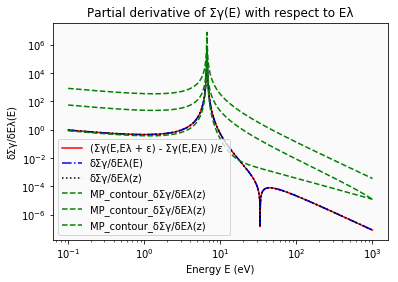

In [93]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 10000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5
## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Eλ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_E0) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Eλ + ε) - Σγ(E,Eλ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , '-.b', label='δΣγ/δEλ(E)') 
plt.loglog(z_g**2 , np.abs(np.array([ analytic_dΣγ_dΓ(z_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , ':k', label='δΣγ/δEλ(z)') 
plt.loglog(z_g**2 , np.abs(np.array([ multipole_dΣ_dΓ(z_g[g], Π, dp_dΓ, dr_dΓ ) for g in range(E_g.size)])) , '--g', label='MP_contour_δΣγ/δEλ(z)') 
plt.ylabel('δΣγ/δEλ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

This is probably a bug. 
But it could be due to the Real part, which breaks the analytic properties. Must use the explicit version with the complex conjugates or look carefully how to compute this. It is not obvious. 